In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
#pytesseract for reading text embedded in image

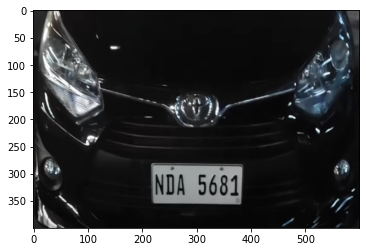

In [2]:
#read input img and resize image
img = cv2.imread('402.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400))
plt.imshow(img)

In [3]:
#using cvtcolor for grayscaling
#using bilateralFilter for blurring unneccesary bgimages
#can implement gaussian filter approach here
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 


In [4]:
#canny edge method for edge detection (becomes black and white)
edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [5]:
#loop to find the reactangular shape contour in input image
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1
#if detected saved it to var screencnt and draw rectangular box
if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

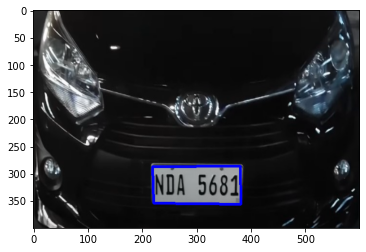

In [6]:
#masking the cut rectangular shape
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(img)

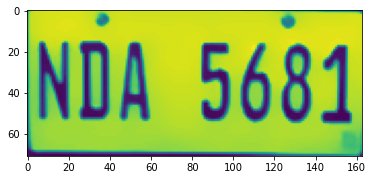

In [7]:
#character segmentation for cropping 
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.imshow(Cropped)

In [8]:
#character recognition
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("License Plate Recognition\n")
print("Detected license plate Number is:",text)

img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)


cv2.waitKey(0)
cv2.destroyAllWindows()


License Plate Recognition

Detected license plate Number is: NDA 5684



error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-2xuh8u7r\opencv\modules\highgui\src\window.cpp:679: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [9]:
import cv2
cap = cv2.VideoCapture('carvideo.mp4')
car_cascade = cv2.CascadeClassifier('cars.xml')
while True:
    ret, frames = cap.read()
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.7, 1)
    for (x ,y ,w ,h) in cars:
        cv2.rectangle(frames ,(x ,y) ,( x +w , y +h) ,(0 ,0 ,255) ,2)
    cv2.imshow('video2', frames)
    if cv2.waitKey(33) == 27:
        break
cv2.destroyAllWindows()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-2xuh8u7r\opencv\modules\highgui\src\window.cpp:679: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
